# Neural Game Of Life

Comblez le code manquant pour compléter le Jeu de la vie.

La version finale doit être exécutable en 2 modes: standard et neuronale.

Ainsi, vous devez prévoir 2 fonctions "voisins", qui compte le nombre de voisins d'une cellule.

Dans le jeu de la vie, simplement changer la valeur de la variable "mode" pour passer d'un mode à l'autre.

MODE_STANDARD = 0

MODE_NEURAL = 1

**mode = MODE_STANDARD   # Ou MODE_NEURAL**

*Peut importe les points finaux, vous ne pouvez pas avoir une note supérieure à 9/15 si AUCUN de vos modes ne fonctionne bien.*




## RND - MLP

(7 points)

In [1]:
# BOYOM MATSI LYN JOYCE BOYL82290500
# TOWA KENGNE JULIE CHARLINE TOWJ70330400
# Importation des bibliothèques
# Vos instructions ici...
import numpy as np
from sklearn.neural_network import MLPRegressor
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1 POINT
# Initialisation du générateur de nombres aléatoires
# Doit assurer la reproductibilité
# Vos instructions ici...
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# 1 POINT
# Générer 100 données avec 8 caractéristiques binaires et la caractéristique cible (somme des caractéristiques binaires)
# Vos instructions ici...
X = np.random.randint(2, size=(100, 8))
Y = np.sum(X, axis=1)

In [4]:
# 1 POINT
# Diviser les données en ensembles d'entraînement et de test (X_train, X_test, Y_train, Y_test)
# 80% pour l'entraînement et 20% pour les tests.
# Assurer la reproductibilité
# Vos instructions ici...
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED)

In [5]:
# 1 POINT
# Créer le modèle MLPRegressor nommé mlp, 1 couche cachée avec 8 neurones. Reproductible, Maximum 1000 itérations d'apprentissage.
# Vos instructions ici...
mlp = MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=SEED)

In [6]:
# 1 POINT
# Entraîner le modèle sur les données d'entraînement
# Vos instructions ici...
mlp.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [7]:
# 1 POINT
# Faire des prédictions sur les données de test.
# Vos instructions ici...
Y_pred = mlp.predict(X_test)

In [8]:
# 1 POINT
# Calculer et afficher l'erreur quadratique moyenne (MSE) et coefficient de détermination R^2 (le score)
# Vos instructions ici...
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("R^2:", r2_score(Y_test, Y_pred))

MSE: 0.020340135524628995
R^2: 0.9883604374680235


In [9]:
# Tester individuellement le model avec .predict.
# Le paramètre est un tableau 2 dimensions qui contient 1 ligne, et 8 caractéristiques valant 0 ou 1.
# Le résultat doit donner une bonne approximation du nombre de voisins.
print(mlp.predict([[0,0,0,0,0,0,0,0]]))
print(mlp.predict([[0,0,1,0,0,0,0,0]]))
print(mlp.predict([[0,0,0,1,0,1,0,0]]))
print(mlp.predict([[0,1,0,1,1,0,0,0]]))
print(mlp.predict([[1,0,1,0,1,0,1,0]]))
print(mlp.predict([[0,1,1,0,1,1,1,0]]))
print(mlp.predict([[1,1,0,1,1,1,0,1]]))
print(mlp.predict([[1,1,1,1,0,1,1,1]]))
print(mlp.predict([[1,1,1,1,1,1,1,1]]))

[0.44638066]
[1.23371034]
[2.2110454]
[3.22466563]
[4.07433624]
[4.95882275]
[5.85662521]
[6.75759833]
[7.80810188]


Ceci termine votre modèle de RDN - MLP. Assurez-vous qu'il soit fonctionnel avant de l'appeler dans le jeu de la vie.

## Jeu de la vie

(8 points)

In [10]:
# Importation des librairies.
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [11]:
# Déclaration des constantes
MORT = 0
VIVANT = 1
TAILLE = 100
NB_GENERATION = 60
MODE_STANDARD = 0
MODE_NEURAL = 1

# Assignez mode à MODE_STANDARD ou MODE_NEURAL, selon le mode d'exécution attendu.
mode = MODE_STANDARD

In [12]:
# 1 POINT
# Initialisation de toutes les cellules de la grille à des 0 ou des 1.
# Une seule instruction requise.
# Nommez la variable (un tableau 2d): grille
# Vos instructions ici...
grille = np.random.randint(2, size=(TAILLE, TAILLE))

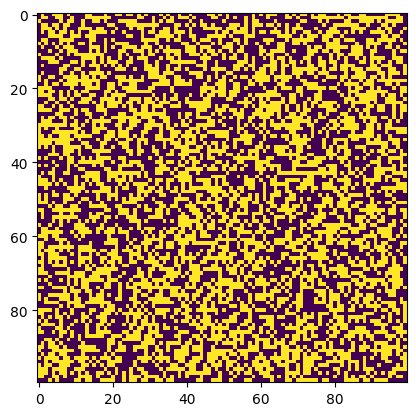

In [13]:
# Affiche le graphique
fig, ax = plt.subplots()
im = plt.imshow(grille);

In [14]:
# 2 POINTS
# Foncion "voisin" qui compte et retourne le nombre de voisins.
# C'est la fonction appellée par le mode MODE_STANDARD.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def voisin(i, j):
  # Vos instructions ici...
  nb_voisin = np.sum(grille[max(0,i-1):min(TAILLE,i+2), max(0,j-1):min(TAILLE,j+2)]) - grille[i,j]
  return nb_voisin

In [15]:
# 2 POINTS
# Foncion "voisin_mlp" qui compte et retourne le nombre de voisins, mais en mode MODE_NEURAL.
# Elle compte le nombre de voisin en faisant appel à la fonction mlp.predict() du modèle entraîné plus haut.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def voisin_mlp(i, j):
  # Vos instructions ici...
  directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
  nb_voisin = round (mlp.predict([[grille[min(max(0,i+d[0]),TAILLE-1), min(max(0,j+d[1]),TAILLE-1)] for d in directions]])[0])
  return nb_voisin

In [16]:
# 3 POINTS
# Calcul la génération de cellules suivante
def generation_suivante(old_grille):
  global grille
  nouvelle_grille = old_grille
  # Deux boucles imbriquées, sur les lignes et les colonnes.

    # Vos instructions ici...
  for i in range(TAILLE):
        for j in range(TAILLE):

    # Pour chaque cellule, on calcule le nombre de voisins (selon le mode d'exécution)

    # Vos instructions ici...
            nb_voisin = voisin(i, j) if mode == MODE_STANDARD else voisin_mlp(i, j)

    # Applique les règles du jeu de la vie pour les cellules, selon l'état et le nombre de voisin de la cellule étudiée.

    # Vos instructions ici...
            if grille[i,j] == VIVANT:
              if nb_voisin < 2 or nb_voisin > 3:
                    nouvelle_grille[i, j] = MORT
            else:
                if nb_voisin == 3:
                    nouvelle_grille[i, j] = VIVANT



  return nouvelle_grille

In [17]:
# Autres instructions importantes pour la mise à jour du tableau et la gestion de l'animation

# Fonction d'initialisation de l'animation
def init():
    im.set_data(grille)
    return [im]

# Fonction de la mise à jour de l'animation
def update(frames):
    global grille
    # Récupère les données
    old_grille = im.get_array()
    # calcule la génération suivante
    grille = generation_suivante(old_grille)
    # Réassigne les nouvelles données
    im.set_array(grille)
    return [im]

# Fonction d'animation
# np.linspace(debut, fin, num=nombre_de_division_dans_le_vecteur): Produit un vecteur sur le nombre de frame
ani = animation.FuncAnimation(fig, update, init_func=init, frames=np.linspace(0, NB_GENERATION, num=NB_GENERATION), interval=1000)
#ani = animation.FuncAnimation(fig, update, init_func=init,  interval=100)

plt.rcParams["animation.html"] = "jshtml"
ani

